# Jupyter Notebook for Base Multi-Layered Perceptron and Best Multi-Layered Perceptron

#### Some Imports

In [5]:
from utils import getClassificationReport, getData
from typing import List
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt
import pandas

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,1,1,1,1,1,1,1,0,1,1,...,1,1,1,0,1,1,1,1,1,1
75,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
76,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
77,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1


In [7]:
ds1_training = getData("train_1.csv")
ds2_training = getData("train_2.csv")

ds1_val = getData("val_1.csv")
ds2_val = getData("val_2.csv")

ds1_testnolabel = getData("test_no_label_1.csv")
ds2_testnolabel = getData("test_no_label_2.csv")

ds1_testlabel = getData("test_with_label_1.csv")
ds2_testlabel = getData("test_with_label_2.csv")

print("Done")

Done


In [9]:
ds0 = getData("0.csv")
baseMLPDemo = MLPClassifier(hidden_layer_sizes=(100,), activation="logistic", solver="sgd")
baseMLPDemo.fit(ds1_training.iloc[:, :-1], ds1_training.iloc[:, -1])
ds0_out = baseMLPDemo.predict(ds0)
ds0_out

/home/william/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([ 6,  8, 13, 13, 14,  2, 12, 13,  8, 11, 10, 12,  8,  8, 14,  8, 14,
       11, 11,  0, 10, 17,  9,  9, 16,  8, 17,  6, 14,  9, 15, 14, 11,  8,
       13, 10, 10,  8,  2, 13, 13, 12,  8, 16, 14,  9, 13, 13, 13, 12,  6,
       12,  2, 15,  0, 13, 12,  9, 14,  8, 10, 17, 10, 13,  8, 13,  2, 13,
       10, 13,  2,  2, 17,  8, 13,  2, 15, 14,  2])

In [13]:
import csv
with open("./results/MLP_ds0_out.csv", "w") as out:
    for prediction in ds0_out:
        out.write(str(prediction))
        out.write(",")
        out.write("\n")

### Loading datasets into Pandas dataframes

## Base MLP

In [3]:
baseMlpClassifier_1 = MLPClassifier(hidden_layer_sizes=(100,), activation="logistic", solver="sgd")
baseMlpClassifier_2 = MLPClassifier(hidden_layer_sizes=(100,), activation="logistic", solver="sgd")

print("Done")

Done


### Training

In [4]:
baseMlpClassifier_1.fit(ds1_training.iloc[:, :-1], ds1_training.iloc[:, -1])
baseMlpClassifier_2.fit(ds2_training.iloc[:, :-1], ds2_training.iloc[:, -1])

print("Done")

/home/william/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Done


/home/william/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Testing

In [5]:
baseMlp_ds1_out = baseMlpClassifier_1.predict(ds1_testlabel.iloc[:, :-1])
baseMlp_ds2_out = baseMlpClassifier_2.predict(ds2_testlabel.iloc[:, :-1])

print("Done")

Done


### Base MLP ds1 Confusion Matrix

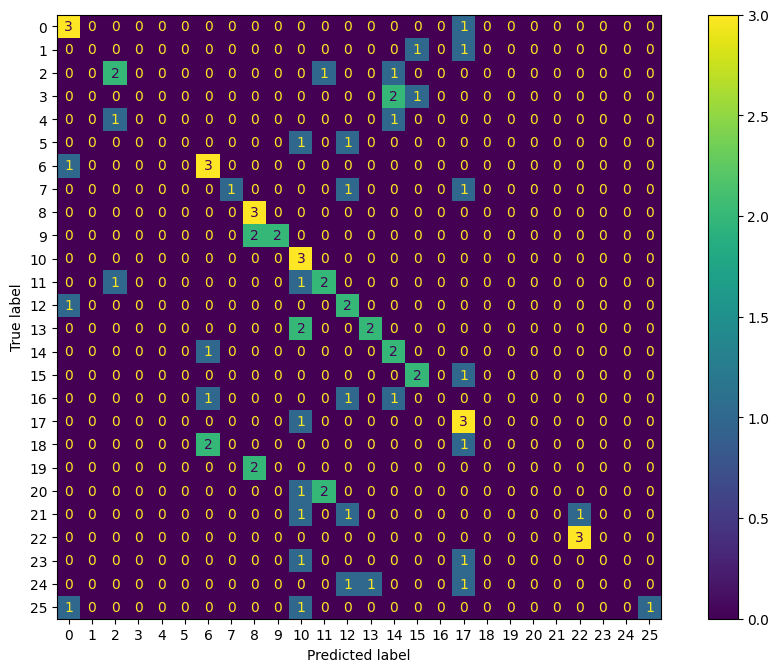

In [6]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

ds1_confusion_matrix = confusion_matrix(ds1_testlabel.iloc[:,-1], baseMlp_ds1_out)
disp_ds1 = ConfusionMatrixDisplay(ds1_confusion_matrix)
disp_ds1.plot()

### Base MLP ds1 Performance metrics

In [7]:
#(c) the precision, recall, and f1-measure for each class
#(d) the accuracy, macro-average f1 and weighted-average f1 of the model
print(classification_report(ds1_testlabel.iloc[:,-1], baseMlp_ds1_out))
print(accuracy_score(ds1_testlabel.iloc[:,-1], baseMlp_ds1_out))

              precision    recall  f1-score   support

           0       0.50      0.75      0.60         4
           1       0.00      0.00      0.00         2
           2       0.50      0.50      0.50         4
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.43      0.75      0.55         4
           7       1.00      0.33      0.50         3
           8       0.43      1.00      0.60         3
           9       1.00      0.50      0.67         4
          10       0.25      1.00      0.40         3
          11       0.40      0.50      0.44         4
          12       0.29      0.67      0.40         3
          13       0.67      0.50      0.57         4
          14       0.29      0.67      0.40         3
          15       0.50      0.67      0.57         3
          16       0.00      0.00      0.00         3
          17       0.30    

/home/william/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Base MLP ds2 Confusion Matrix

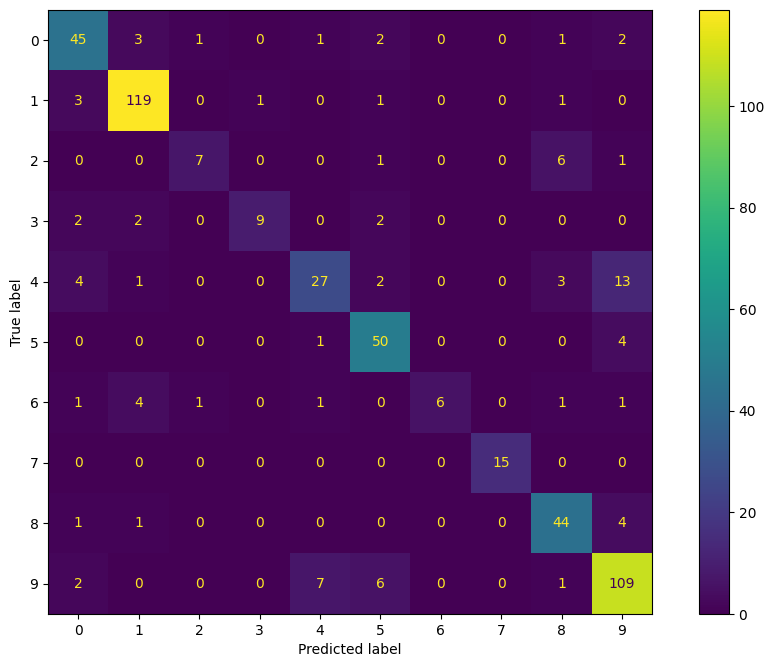

In [8]:
ds2_confusion_matrix = confusion_matrix(ds2_testlabel.iloc[:,-1], baseMlp_ds2_out)
disp_ds2 = ConfusionMatrixDisplay(ds2_confusion_matrix)
disp_ds2.plot()

### Base MLP ds2 Performance Metrics

In [9]:
print(classification_report(ds2_testlabel.iloc[:,-1], baseMlp_ds2_out))
print(accuracy_score(ds2_testlabel.iloc[:,-1], baseMlp_ds2_out))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        55
           1       0.92      0.95      0.93       125
           2       0.78      0.47      0.58        15
           3       0.90      0.60      0.72        15
           4       0.73      0.54      0.62        50
           5       0.78      0.91      0.84        55
           6       1.00      0.40      0.57        15
           7       1.00      1.00      1.00        15
           8       0.77      0.88      0.82        50
           9       0.81      0.87      0.84       125

    accuracy                           0.83       520
   macro avg       0.85      0.74      0.77       520
weighted avg       0.83      0.83      0.82       520

0.8288461538461539


## Best MLP using Grid Search for Hyperparameter Tuning

In [10]:
grid_search_values = {"activation": ["identity", "logistic", "tanh", "relu"], "hidden_layer_sizes": [(30,50), (10,10,10)], "solver": ["sgd", "adam"]}

bestMlpClassifier_1 = GridSearchCV(MLPClassifier(), param_grid=grid_search_values, n_jobs=-1)
bestMlpClassifier_2 = GridSearchCV(MLPClassifier(), param_grid=grid_search_values, n_jobs=-1)

print("Done")

Done


### Training (WARNING: Will take a while)

In [11]:
bestMlpClassifier_1.fit(ds1_training.iloc[:, :-1], ds1_training.iloc[:, -1])

print("Done")

Done


/home/william/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
bestMlpClassifier_2.fit(ds2_training.iloc[:, :-1], ds2_training.iloc[:, -1])

print("Done")

Done


/home/william/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Testing (Will take a while)

In [13]:
bestMlp_ds1_out = bestMlpClassifier_1.predict(ds1_testlabel.iloc[:, :-1])
bestMlp_ds2_out = bestMlpClassifier_2.predict(ds2_testlabel.iloc[:, :-1])

print("Done")

Done


## Best MLP ds1 Confusion Matrix

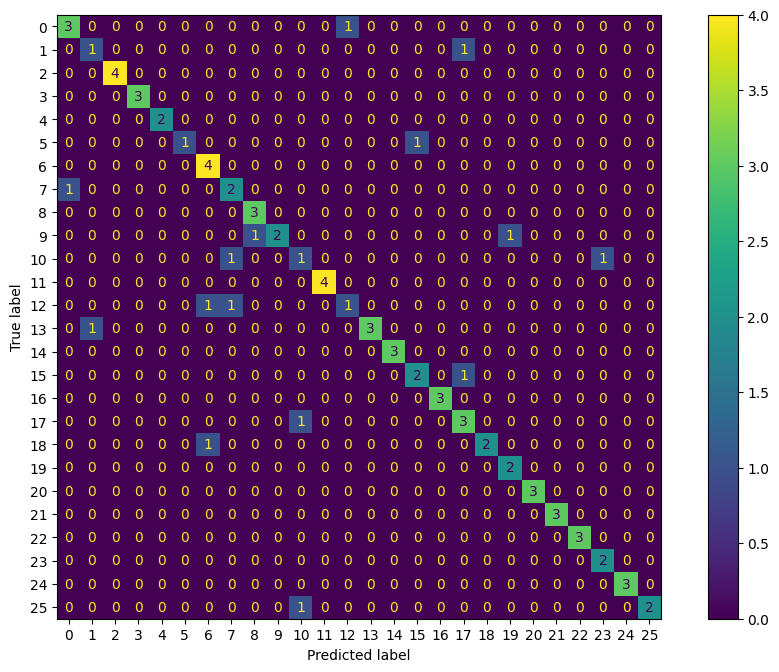

In [14]:
best_ds1_confusion_matrix = confusion_matrix(ds1_testlabel.iloc[:,-1], bestMlp_ds1_out)
best_disp_ds1 = ConfusionMatrixDisplay(best_ds1_confusion_matrix)
best_disp_ds1.plot()

### Best MLP ds1 Performance Metrics

In [15]:
print(classification_report(ds1_testlabel.iloc[:,-1], bestMlp_ds1_out))
print(accuracy_score(ds1_testlabel.iloc[:,-1], bestMlp_ds1_out))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.50      0.50      0.50         2
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      0.50      0.67         2
           6       0.67      1.00      0.80         4
           7       0.50      0.67      0.57         3
           8       0.75      1.00      0.86         3
           9       1.00      0.50      0.67         4
          10       0.33      0.33      0.33         3
          11       1.00      1.00      1.00         4
          12       0.50      0.33      0.40         3
          13       1.00      0.75      0.86         4
          14       1.00      1.00      1.00         3
          15       0.67      0.67      0.67         3
          16       1.00      1.00      1.00         3
          17       0.60    

### Best MLP ds2 Confusion Matrix

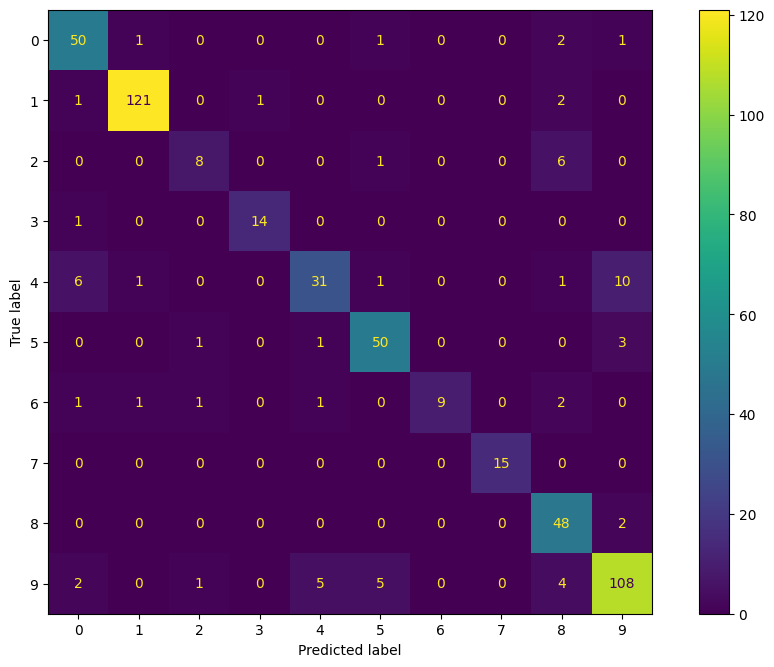

In [16]:
best_ds2_confusion_matrix = confusion_matrix(ds2_testlabel.iloc[:,-1], bestMlp_ds2_out)
best_disp_ds2 = ConfusionMatrixDisplay(best_ds2_confusion_matrix)
best_disp_ds2.plot()

### Best MLP ds2 Performance Metrics

In [17]:
print(classification_report(ds2_testlabel.iloc[:,-1], bestMlp_ds2_out))
print(accuracy_score(ds2_testlabel.iloc[:,-1], bestMlp_ds2_out))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        55
           1       0.98      0.97      0.97       125
           2       0.73      0.53      0.62        15
           3       0.93      0.93      0.93        15
           4       0.82      0.62      0.70        50
           5       0.86      0.91      0.88        55
           6       1.00      0.60      0.75        15
           7       1.00      1.00      1.00        15
           8       0.74      0.96      0.83        50
           9       0.87      0.86      0.87       125

    accuracy                           0.87       520
   macro avg       0.87      0.83      0.84       520
weighted avg       0.88      0.87      0.87       520

0.8730769230769231


# Since we have all we need, let's write the results to a file

In [23]:
with open(r"./results/mlResults/Base-MLP-DS1.csv", "w") as f:
    for real, predicted in zip(ds1_testlabel.iloc[:, -1], baseMlp_ds1_out):
        f.write(str(real) + "," + str(predicted) + "\n")
    
    pandas.DataFrame(ds1_confusion_matrix).to_csv(f)
    
    report = classification_report(ds1_testlabel.iloc[:,-1], baseMlp_ds1_out, output_dict=True)
    df = pandas.DataFrame(report).transpose()
    df.to_csv(f)

In [24]:
with open(r"./results/mlResults/Base-MLP-DS2.csv", "w") as f:
    for real, predicted in zip(ds2_testlabel.iloc[:, -1], baseMlp_ds2_out):
        f.write(str(real) + "," + str(predicted) + "\n")
    
    pandas.DataFrame(ds2_confusion_matrix).to_csv(f)
    
    report = classification_report(ds2_testlabel.iloc[:,-1], baseMlp_ds2_out, output_dict=True)
    df = pandas.DataFrame(report).transpose()
    df.to_csv(f)
    
    

In [25]:
with open(r"./results/mlResults/Best-MLP-DS1.csv", "w") as f:
    for real, predicted in zip(ds1_testlabel.iloc[:, -1], bestMlp_ds1_out):
        f.write(str(real) + "," + str(predicted) + "\n")
    
    pandas.DataFrame(best_ds1_confusion_matrix).to_csv(f)
    
    report = classification_report(ds1_testlabel.iloc[:,-1], bestMlp_ds1_out, output_dict=True)
    df = pandas.DataFrame(report).transpose()
    df.to_csv(f)

In [26]:
with open(r"./results/mlResults/Best-MLP-DS2.csv", "w") as f:
    for real, predicted in zip(ds2_testlabel.iloc[:, -1], bestMlp_ds2_out):
        f.write(str(real) + "," + str(predicted) + "\n")
        
    pandas.DataFrame(best_ds1_confusion_matrix).to_csv(f)
    
    report = classification_report(ds2_testlabel.iloc[:,-1], bestMlp_ds2_out, output_dict=True)
    df = pandas.DataFrame(report).transpose()
    df.to_csv(f)